In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
bench = pd.concat([
    pd.read_table("CompactBitVector.tsv"),
    pd.read_table("SucVector.tsv"),
    pd.read_table("RRR.tsv"),
    pd.read_table("LargeRRR.tsv")
])

In [4]:
bench.type = map(lambda s: s.split(".")[1], bench.type)

In [5]:
pd.options.display.max_rows = 1000

### Result

In [6]:
bench

,type,length,r,bench_getindex,bench_rank1,bench_select1
0,CompactBitVector,1024,0.01,8.982422e-10,5.763672e-10,1.048086e-08
1,CompactBitVector,4096,0.01,9.233887e-10,5.969238e-10,1.269956e-08
2,CompactBitVector,16384,0.01,8.976074e-10,5.043579e-10,1.228219e-08
3,CompactBitVector,65536,0.01,8.940216e-10,5.368927e-10,1.148207e-08
4,CompactBitVector,262144,0.01,9.042000e-10,5.360107e-10,1.146991e-08
5,CompactBitVector,1048576,0.01,8.485035e-10,4.860338e-10,1.239175e-08
6,CompactBitVector,4194304,0.01,7.903986e-10,4.842871e-10,1.262928e-08
7,CompactBitVector,16777216,0.01,8.740447e-10,5.272128e-10,1.254743e-08
8,CompactBitVector,1024,0.10,1.037695e-09,6.130859e-10,2.321699e-08
9,CompactBitVector,4096,0.10,9.118164e-10,5.976563e-10,2.627690e-08


In [7]:
figsize(12, 8)

In [8]:
def plot_bench(name, r):
    bench[bench.r == r]\
        .pivot(index="length", columns="type", values="bench_" + name)\
        .plot(style="o-")
    title("{} (r = {})".format(name, r))
    xscale("log", basex=2)
    ylabel("sec / op")
    ticklabel_format(style="scientific", axis="y", scilimits=(0,0))
    grid()
    savefig("{}_{}.png".format(name, r))

### dense

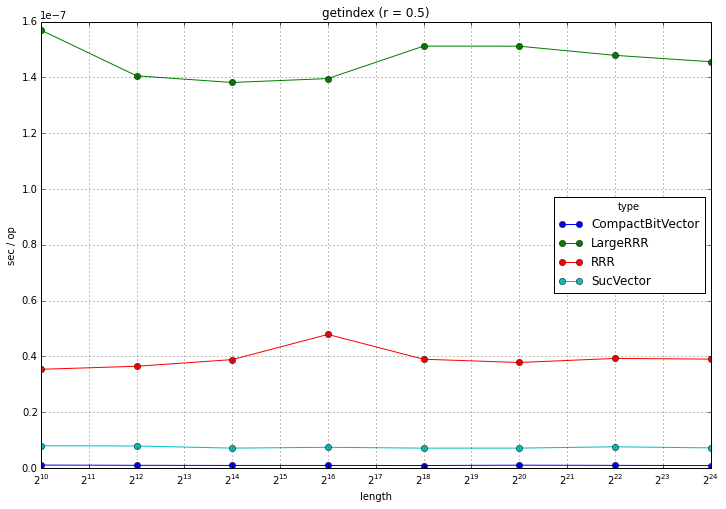

In [9]:
plot_bench("getindex", 0.5)

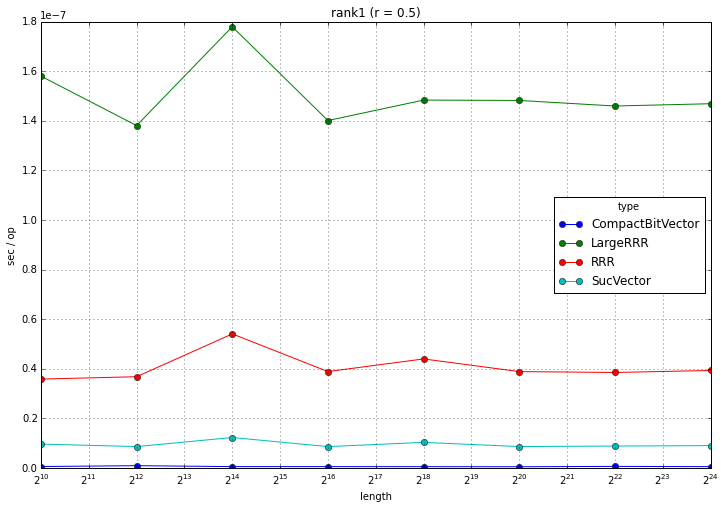

In [10]:
plot_bench("rank1", 0.5)

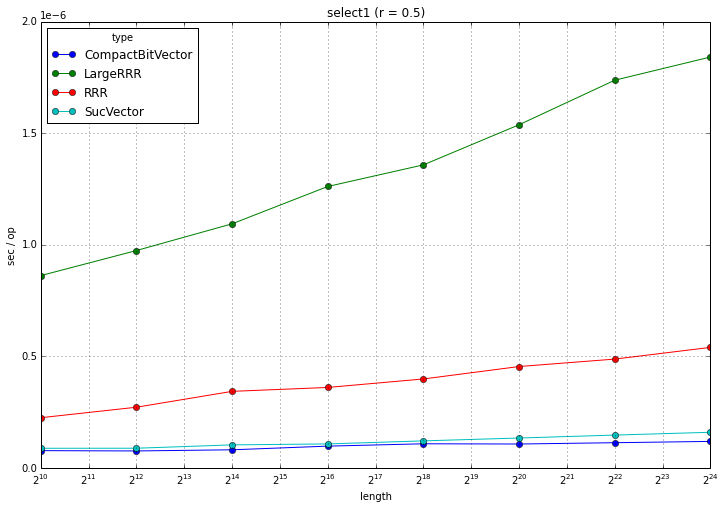

In [11]:
plot_bench("select1", 0.5)

### sparse

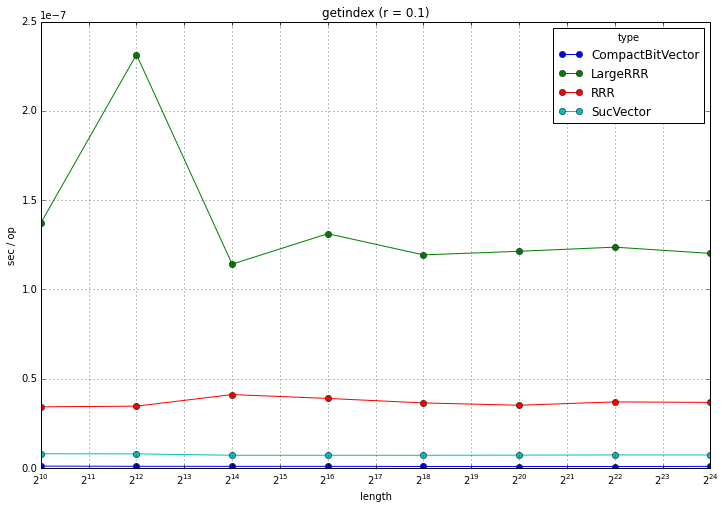

In [12]:
plot_bench("getindex", 0.1)

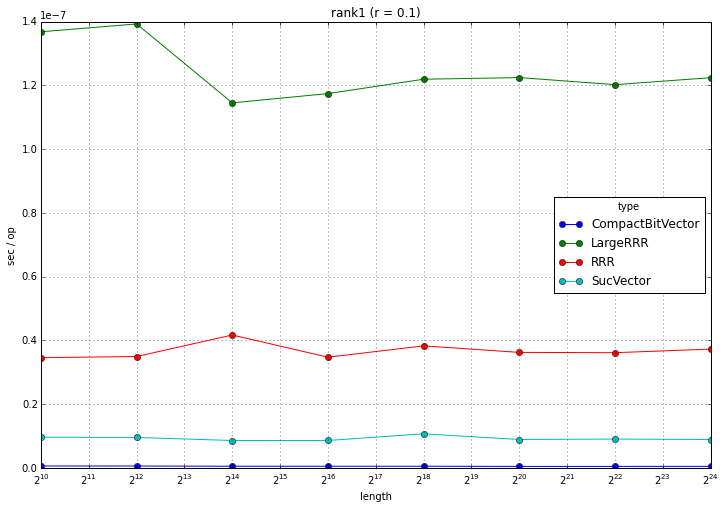

In [13]:
plot_bench("rank1", 0.1)

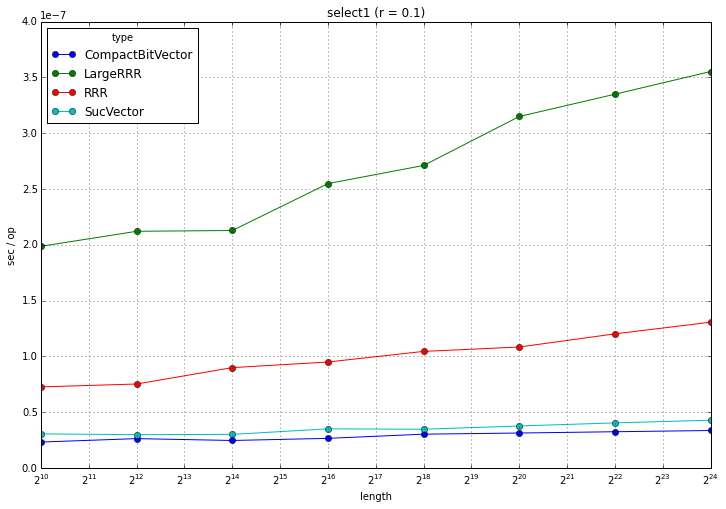

In [14]:
plot_bench("select1", 0.1)

### very sparse

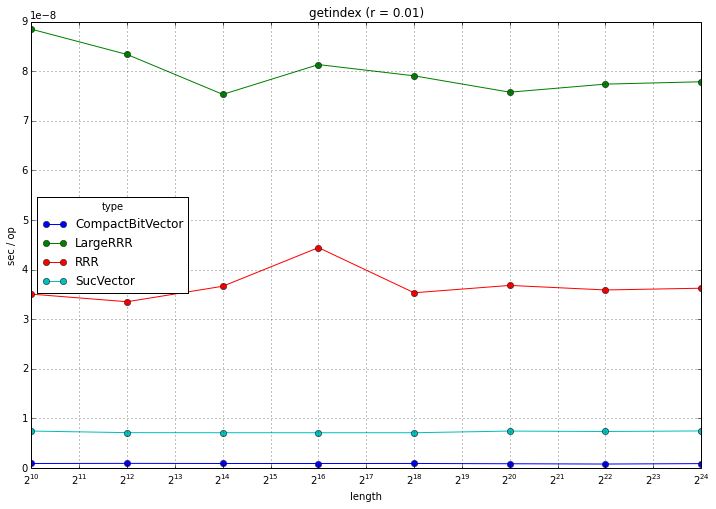

In [15]:
plot_bench("getindex", 0.01)

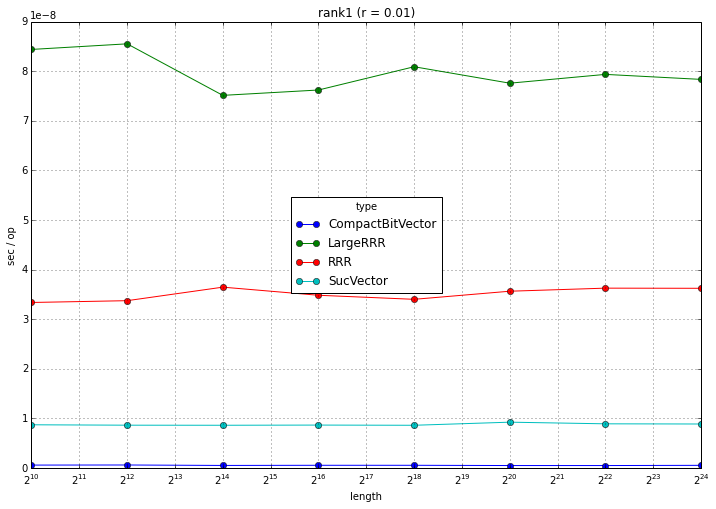

In [16]:
plot_bench("rank1", 0.01)

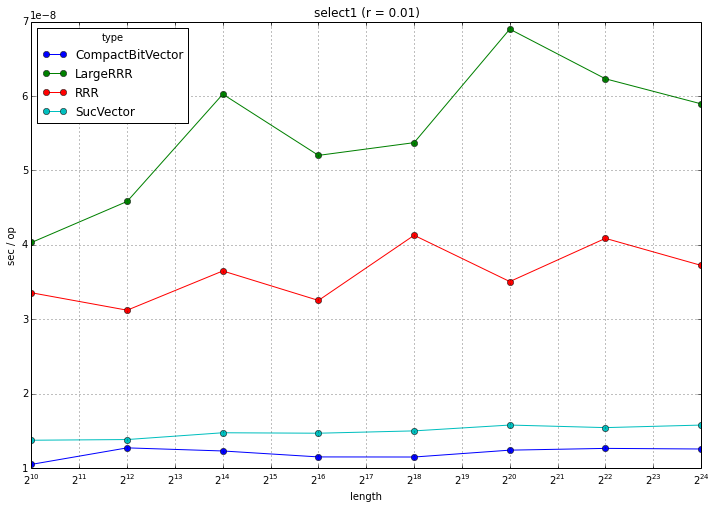

In [17]:
plot_bench("select1", 0.01)